In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import pytz
from preprocess import Input
from model import LSTMModel
import pickle
from forecast import ForecastIntraday
import tensorflow as tf
import itertools
import schedule
import time
from prettytable import PrettyTable

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

In [16]:
#input path
path="C:\\Users\\Dilan\\Desktop\\BIST30-Report\\PastData"


In [4]:
def createModel(T,Ntest,Nsplit,df,epoch_number,Layer1,Layer2,featureNumber,stockname):

    model=LSTMModel(Ntest,T,Nsplit,epoch_number,Layer1,Layer2,featureNumber,stockname)
    df_out,mape_final,Y_test,P_test=model.dfModel(df,'H')
    df_plot=df_out[-400:-200]
    df_plot[['price', 'multistep_test']].plot(figsize=(15, 5))
    plt.title(stockname)
    plt.show()
    return mape_final,df_out, Y_test, P_test

In [5]:
def createIntradayForecast(df,T,Ntest,featureNumber,scaler_name,model_name,stockname):


    #load scaler
    with open(scaler_name, 'rb') as f:
        scaler = pickle.load(f)
    #load best model
    best_model1 = tf.keras.models.load_model(model_name)
    forecast=ForecastIntraday()
    forecast_intraday=forecast.getCurrentForecast(df,best_model1,scaler,T,Ntest,featureNumber,stockname)
    print(forecast_intraday)

    return forecast_intraday

In [6]:
def gridSearch(T_dict,Ntest_dict,Nsplit_dict,df,Layer1_dict,Layer2_dict,epoch_number_dict,featureNumber,stockname):
    best_score = 100.0
    best_params = {}

    for T,Ntest,Nsplit,Layer1,Layer2,epoch_number in itertools.product(
            T_dict,Ntest_dict,Nsplit_dict,Layer1_dict,Layer2_dict,epoch_number_dict):
        mape,df_out,Ytest,Ptest=createModel(T,Ntest,Nsplit,df,epoch_number,Layer1,Layer2,featureNumber,stockname)

        print("Done")
        print(mape)

        if (mape) < best_score:
            best_score = mape
            print(best_score)
            best_params = {
                'T_range': T,
                'Ntest_range': Ntest,
                'Nsplit_range': Nsplit,
                'Layer1': Layer1,
                'Layer2': Layer2,
                'Epoch_number':epoch_number

            }

    return best_params, best_score

In [17]:
input=Input(path=path)
input_df=input.concatenate_csv_files()

NaN counts in df
:timestamp     0
price         0
short_name    0
dtype: int64


MODEL PARAMETERS

In [21]:
#input number
T=10
#output number
Ntest=10
Nsplit=90*10
Layer1=256
Layer2=256
epoch_number=10
featureNumber=5

In [22]:
bist30 = input_df['short_name'].unique()

In [23]:
#initialize mape dictionary to store performance
mape_dict={}
df_out_dict={}
Ytest_dict={}
Ptest_dict={}

THYAO
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 38s 73ms/step - loss: 0.0013 - val_loss: 9.0043e-04
Epoch 2/10
437/437 [==============================] - 1652s 4s/step - loss: 1.2267e-04 - val_loss: 9.2318e-04
Epoch 3/10
437/437 [==============================] - 68s 156ms/step - loss: 1.5108e-04 - val_loss: 0.0016
Epoch 4/10
437/437 [==============================] - 32s 72ms/step - loss: 1.7788e-04 - val_loss: 0.0017
Epoch 5/10
437/437 [==============================] - 29s 67ms/step - loss: 2.2869e-04 - val_loss: 0.0010
Epoch 6/10
437/437 [==============================] - 28s 65ms/step - loss: 7.2937e-05 - val_loss: 9.5974e-04
Epoch 7/10
437/437 [==============================] - 29s 66ms/step - loss: 1.0991e-04 - val_loss: 9.0793e-04
Epoch 8/10
437/437 [==============================] - 29s 66ms/step - loss: 7.9805e-05 - val_loss: 0.0013
Epoch 9/10
437/437 [==============================] - 29s 66ms/step - loss: 7.6848e-05 - v

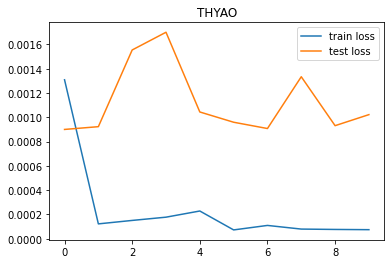

29/29 [==============================] - 1s 22ms/step
1-step MAPE: 2.8133546321071456
1-step MAPE: 2.8133546321071456


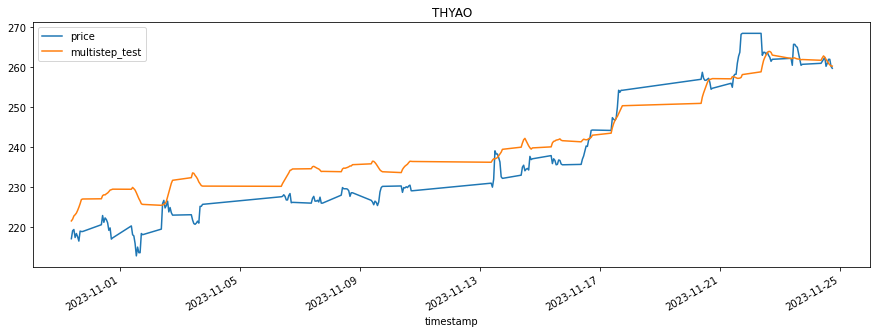

AKBNK
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 38s 70ms/step - loss: 7.4086e-04 - val_loss: 0.0032
Epoch 2/10
437/437 [==============================] - 30s 69ms/step - loss: 1.5370e-04 - val_loss: 0.0023
Epoch 3/10
437/437 [==============================] - 34s 78ms/step - loss: 1.5162e-04 - val_loss: 0.0022
Epoch 4/10
437/437 [==============================] - 34s 77ms/step - loss: 1.2615e-04 - val_loss: 0.0039
Epoch 5/10
437/437 [==============================] - 30s 68ms/step - loss: 1.1129e-04 - val_loss: 0.0027
Epoch 6/10
437/437 [==============================] - 34s 77ms/step - loss: 1.2326e-04 - val_loss: 0.0019
Epoch 7/10
437/437 [==============================] - 30s 70ms/step - loss: 1.0232e-04 - val_loss: 0.0043
Epoch 8/10
437/437 [==============================] - 28s 65ms/step - loss: 8.5688e-05 - val_loss: 8.9883e-04
Epoch 9/10
437/437 [==============================] - 30s 68ms/step - loss: 8.8685e-05 - val_loss: 

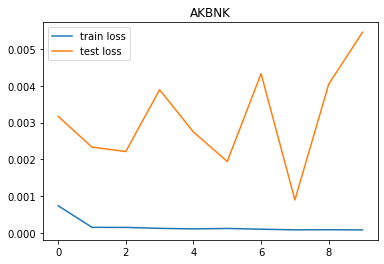

29/29 [==============================] - 1s 22ms/step
1-step MAPE: 1.8084107756222716
1-step MAPE: 1.8084107756222716


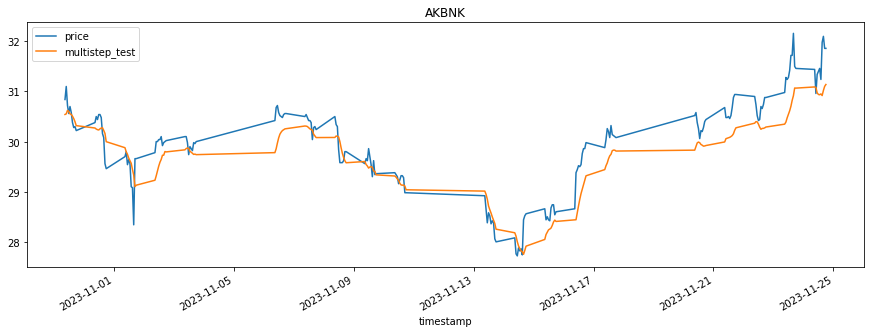

ARCLK
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 39s 74ms/step - loss: 0.0014 - val_loss: 6.5603e-04
Epoch 2/10
437/437 [==============================] - 28s 65ms/step - loss: 2.1239e-04 - val_loss: 5.1886e-04
Epoch 3/10
437/437 [==============================] - 33s 76ms/step - loss: 2.0698e-04 - val_loss: 4.8607e-04
Epoch 4/10
437/437 [==============================] - 30s 69ms/step - loss: 1.8568e-04 - val_loss: 0.0015
Epoch 5/10
437/437 [==============================] - 30s 69ms/step - loss: 1.6647e-04 - val_loss: 0.0011
Epoch 6/10
437/437 [==============================] - 31s 70ms/step - loss: 1.6248e-04 - val_loss: 0.0026
Epoch 7/10
437/437 [==============================] - 30s 68ms/step - loss: 1.5985e-04 - val_loss: 7.4230e-04
Epoch 8/10
437/437 [==============================] - 31s 70ms/step - loss: 1.3046e-04 - val_loss: 3.5440e-04
Epoch 9/10
437/437 [==============================] - 31s 70ms/step - loss: 1.4827e-04 

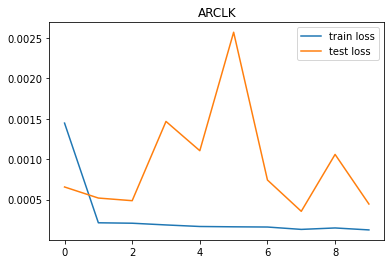

29/29 [==============================] - 1s 25ms/step
1-step MAPE: 1.1074313923989234
1-step MAPE: 1.107431392398925


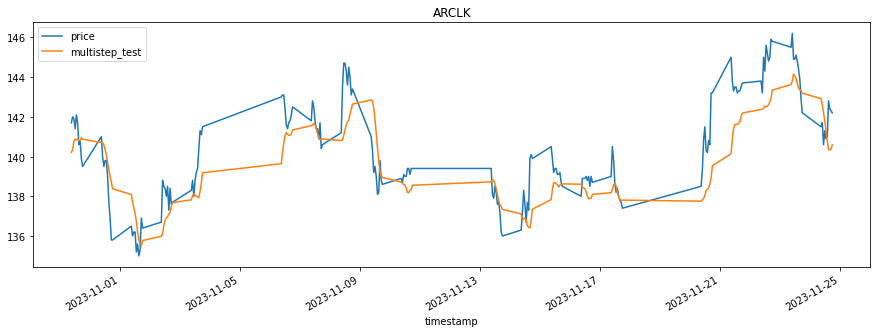

ASELS
X.shape (14748, 10, 5) Y.shape (14748, 10)
Epoch 1/10
433/433 [==============================] - 38s 72ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 2/10
433/433 [==============================] - 32s 75ms/step - loss: 1.5342e-04 - val_loss: 0.0084
Epoch 3/10
433/433 [==============================] - 36s 83ms/step - loss: 1.6725e-04 - val_loss: 0.0025
Epoch 4/10
433/433 [==============================] - 34s 79ms/step - loss: 1.3471e-04 - val_loss: 0.0059
Epoch 5/10
433/433 [==============================] - 33s 76ms/step - loss: 1.1286e-04 - val_loss: 0.0037
Epoch 6/10
433/433 [==============================] - 33s 77ms/step - loss: 1.2120e-04 - val_loss: 0.0054
Epoch 7/10
433/433 [==============================] - 34s 79ms/step - loss: 9.5724e-05 - val_loss: 0.0028
Epoch 8/10
433/433 [==============================] - 39s 91ms/step - loss: 1.0574e-04 - val_loss: 0.0056
Epoch 9/10
433/433 [==============================] - 35s 81ms/step - loss: 9.4893e-05 - val_loss: 0.0031
E

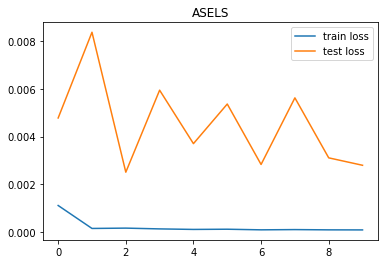

29/29 [==============================] - 1s 23ms/step
1-step MAPE: 4.491620759024204
1-step MAPE: 4.491620759024204


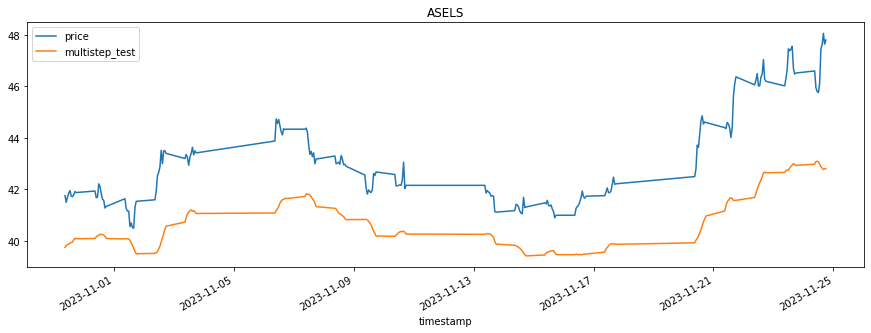

BIMAS
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 41s 80ms/step - loss: 0.0010 - val_loss: 0.0052
Epoch 2/10
437/437 [==============================] - 35s 79ms/step - loss: 1.0275e-04 - val_loss: 0.0011
Epoch 3/10
437/437 [==============================] - 34s 78ms/step - loss: 1.1404e-04 - val_loss: 0.0018
Epoch 4/10
437/437 [==============================] - 35s 79ms/step - loss: 1.0628e-04 - val_loss: 0.0026
Epoch 5/10
437/437 [==============================] - 34s 79ms/step - loss: 9.0122e-05 - val_loss: 0.0022
Epoch 6/10
437/437 [==============================] - 37s 84ms/step - loss: 8.6604e-05 - val_loss: 0.0013
Epoch 7/10
437/437 [==============================] - 46s 105ms/step - loss: 8.7669e-05 - val_loss: 0.0027
Epoch 8/10
437/437 [==============================] - 42s 96ms/step - loss: 7.0859e-05 - val_loss: 9.9283e-04
Epoch 9/10
437/437 [==============================] - 43s 97ms/step - loss: 8.5236e-05 - val_loss: 8.8

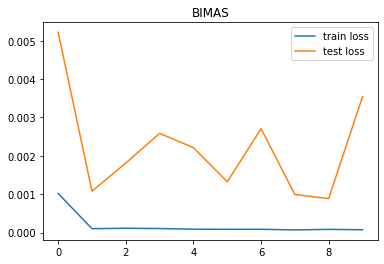

29/29 [==============================] - 1s 32ms/step
1-step MAPE: 1.5987436794497571
1-step MAPE: 1.5987436794497596


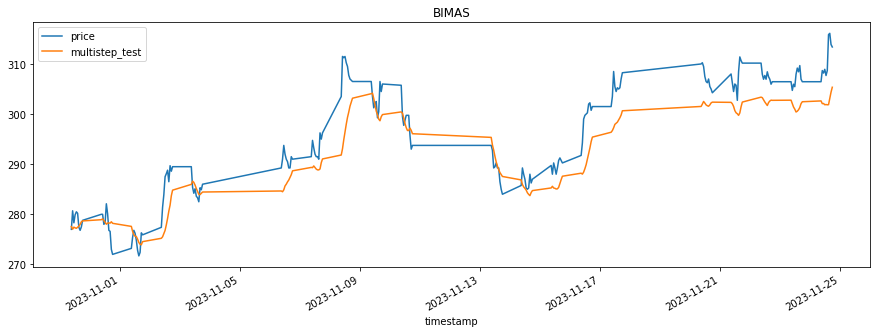

DOHOL
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 58s 119ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 2/10
437/437 [==============================] - 43s 97ms/step - loss: 1.9371e-04 - val_loss: 6.0434e-04
Epoch 3/10
437/437 [==============================] - 42s 97ms/step - loss: 1.7782e-04 - val_loss: 8.4339e-04
Epoch 4/10
437/437 [==============================] - 44s 101ms/step - loss: 1.5034e-04 - val_loss: 0.0010
Epoch 5/10
437/437 [==============================] - 42s 97ms/step - loss: 1.5723e-04 - val_loss: 0.0043
Epoch 6/10
437/437 [==============================] - 44s 100ms/step - loss: 1.8616e-04 - val_loss: 0.0018
Epoch 7/10
437/437 [==============================] - 47s 108ms/step - loss: 1.2515e-04 - val_loss: 5.8938e-04
Epoch 8/10
437/437 [==============================] - 47s 107ms/step - loss: 1.1808e-04 - val_loss: 5.0678e-04
Epoch 9/10
437/437 [==============================] - 48s 109ms/step - loss: 1.1774e-0

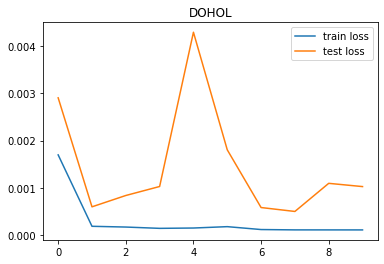

29/29 [==============================] - 1s 24ms/step
1-step MAPE: 1.4091132966340725
1-step MAPE: 1.4091132966340725


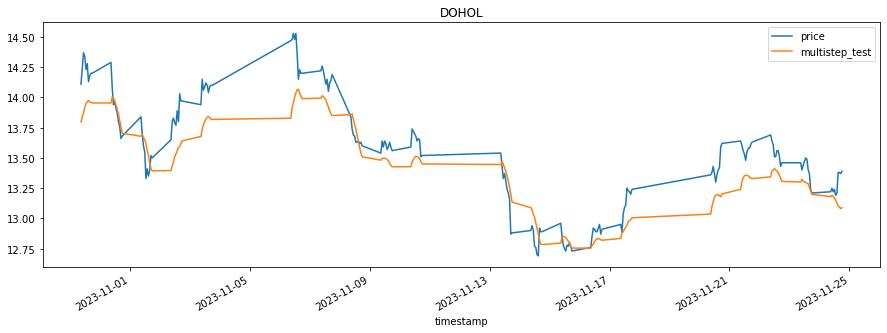

EKGYO
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 61s 125ms/step - loss: 0.0023 - val_loss: 8.9151e-04
Epoch 2/10
437/437 [==============================] - 59s 136ms/step - loss: 2.5803e-04 - val_loss: 0.0016
Epoch 3/10
437/437 [==============================] - 45s 103ms/step - loss: 3.3104e-04 - val_loss: 6.8654e-04
Epoch 4/10
437/437 [==============================] - 34s 78ms/step - loss: 2.9442e-04 - val_loss: 0.0064
Epoch 5/10
437/437 [==============================] - 35s 79ms/step - loss: 2.5206e-04 - val_loss: 8.6011e-04
Epoch 6/10
437/437 [==============================] - 35s 81ms/step - loss: 2.4678e-04 - val_loss: 6.7320e-04
Epoch 7/10
437/437 [==============================] - 38s 86ms/step - loss: 2.1078e-04 - val_loss: 5.4443e-04
Epoch 8/10
437/437 [==============================] - 32s 74ms/step - loss: 2.1936e-04 - val_loss: 6.1372e-04
Epoch 9/10
437/437 [==============================] - 33s 75ms/step - loss: 1.78

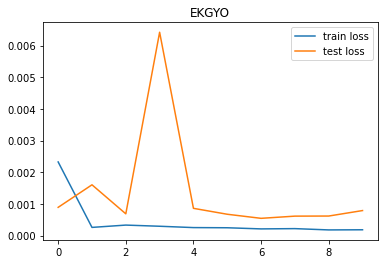

29/29 [==============================] - 1s 23ms/step
1-step MAPE: 1.3057729754538991
1-step MAPE: 1.3057729754538991


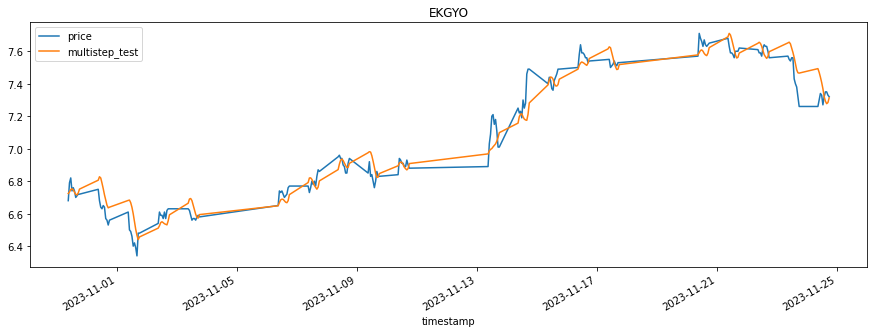

EREGL
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 45s 85ms/step - loss: 0.0021 - val_loss: 7.9914e-04
Epoch 2/10
437/437 [==============================] - 36s 82ms/step - loss: 2.7948e-04 - val_loss: 6.0155e-04
Epoch 3/10
437/437 [==============================] - 43s 98ms/step - loss: 2.7860e-04 - val_loss: 0.0034
Epoch 4/10
437/437 [==============================] - 34s 79ms/step - loss: 2.7045e-04 - val_loss: 8.9543e-04
Epoch 5/10
437/437 [==============================] - 36s 83ms/step - loss: 2.0078e-04 - val_loss: 0.0011
Epoch 6/10
437/437 [==============================] - 36s 83ms/step - loss: 1.9313e-04 - val_loss: 5.2777e-04
Epoch 7/10
437/437 [==============================] - 33s 77ms/step - loss: 1.9261e-04 - val_loss: 4.4697e-04
Epoch 8/10
437/437 [==============================] - 105s 240ms/step - loss: 1.7025e-04 - val_loss: 4.3020e-04
Epoch 9/10
437/437 [==============================] - 146s 334ms/step - loss: 1.9

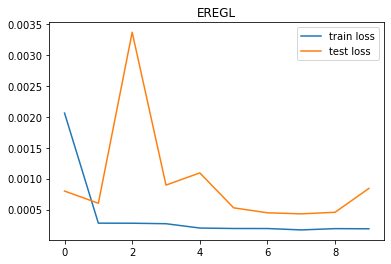

29/29 [==============================] - 1s 21ms/step
1-step MAPE: 1.3458490374994292
1-step MAPE: 1.3458490374994292


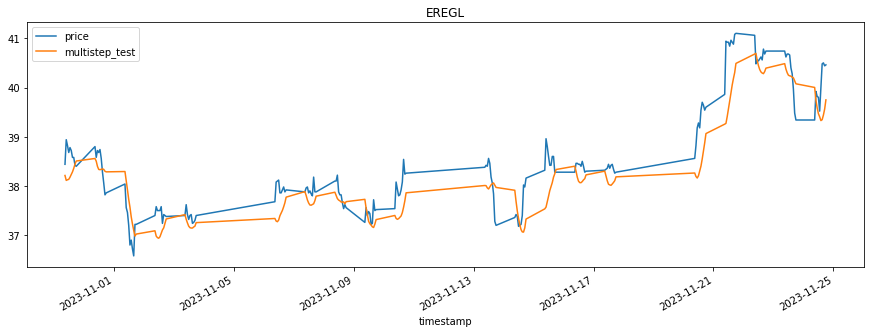

FROTO
X.shape (14857, 10, 5) Y.shape (14857, 10)
Epoch 1/10
437/437 [==============================] - 168s 343ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 2/10
437/437 [==============================] - 60s 137ms/step - loss: 1.4730e-04 - val_loss: 9.3874e-04
Epoch 3/10
437/437 [==============================] - 31s 71ms/step - loss: 1.3345e-04 - val_loss: 0.0037
Epoch 4/10
437/437 [==============================] - 31s 70ms/step - loss: 1.5646e-04 - val_loss: 9.7072e-04
Epoch 5/10
437/437 [==============================] - 30s 69ms/step - loss: 1.0759e-04 - val_loss: 5.6373e-04
Epoch 6/10
437/437 [==============================] - 30s 68ms/step - loss: 1.1277e-04 - val_loss: 0.0025
Epoch 7/10
437/437 [==============================] - 30s 69ms/step - loss: 1.2341e-04 - val_loss: 7.5407e-04
Epoch 8/10
437/437 [==============================] - 30s 69ms/step - loss: 1.0725e-04 - val_loss: 7.6657e-04
Epoch 9/10
437/437 [==============================] - 31s 72ms/step - loss: 7.9990e-

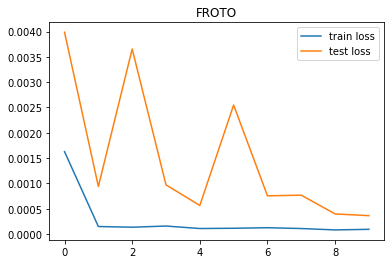

29/29 [==============================] - 1s 32ms/step
1-step MAPE: 1.1399374835234697
1-step MAPE: 1.1399374835234697


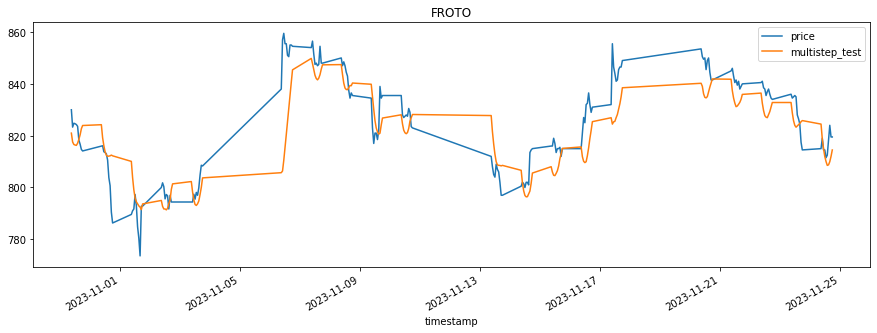

GUBRF
X.shape (14849, 10, 5) Y.shape (14849, 10)
Epoch 1/10
436/436 [==============================] - 40s 76ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 2/10
436/436 [==============================] - 31s 72ms/step - loss: 2.4075e-04 - val_loss: 0.0020
Epoch 3/10
436/436 [==============================] - 32s 73ms/step - loss: 2.2078e-04 - val_loss: 0.0012
Epoch 4/10
436/436 [==============================] - 34s 77ms/step - loss: 1.7944e-04 - val_loss: 0.0011
Epoch 5/10
436/436 [==============================] - 33s 76ms/step - loss: 1.5148e-04 - val_loss: 0.0011
Epoch 6/10
436/436 [==============================] - 33s 76ms/step - loss: 1.4362e-04 - val_loss: 9.6750e-04
Epoch 7/10
436/436 [==============================] - 34s 78ms/step - loss: 1.4191e-04 - val_loss: 0.0012
Epoch 8/10
436/436 [==============================] - 110s 253ms/step - loss: 1.3954e-04 - val_loss: 9.3645e-04
Epoch 9/10
436/436 [==============================] - 140s 322ms/step - loss: 1.4473e-04 - val_lo

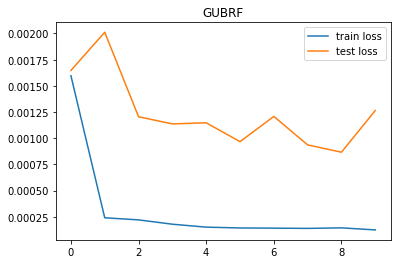

29/29 [==============================] - 1s 21ms/step
1-step MAPE: 1.6864312038059528
1-step MAPE: 1.6864312038059528


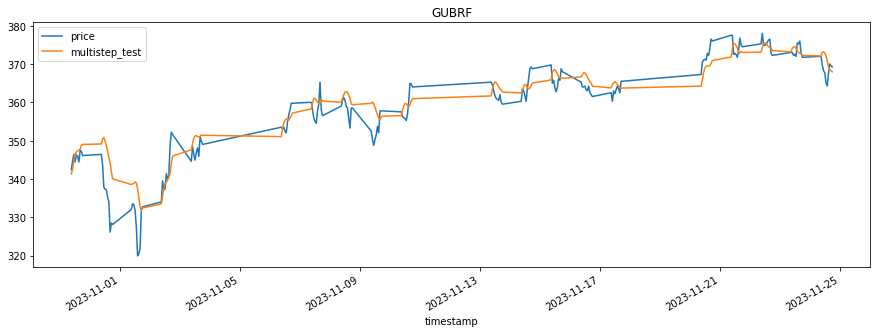

GARAN
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 201s 360ms/step - loss: 8.3440e-04 - val_loss: 0.0013
Epoch 2/10
437/437 [==============================] - 145s 333ms/step - loss: 1.7011e-04 - val_loss: 0.0012
Epoch 3/10
437/437 [==============================] - 127s 290ms/step - loss: 1.6032e-04 - val_loss: 8.9936e-04
Epoch 4/10
437/437 [==============================] - 30s 69ms/step - loss: 1.4173e-04 - val_loss: 0.0032
Epoch 5/10
437/437 [==============================] - 125s 287ms/step - loss: 1.1956e-04 - val_loss: 0.0016
Epoch 6/10
437/437 [==============================] - 145s 332ms/step - loss: 1.1541e-04 - val_loss: 8.7031e-04
Epoch 7/10
437/437 [==============================] - 37s 85ms/step - loss: 1.0698e-04 - val_loss: 0.0033
Epoch 8/10
437/437 [==============================] - 114s 262ms/step - loss: 9.2846e-05 - val_loss: 8.5563e-04
Epoch 9/10
437/437 [==============================] - 144s 330ms/step - loss: 9

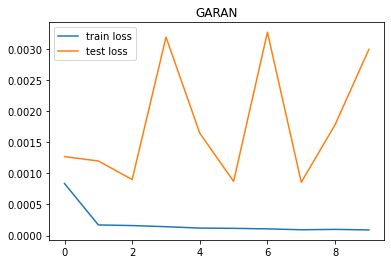

29/29 [==============================] - 3s 112ms/step
1-step MAPE: 1.25298494081045
1-step MAPE: 1.2529849408104499


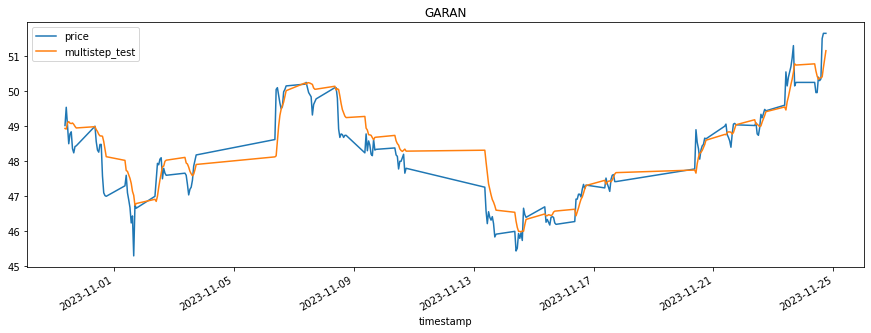

KRDMD
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 189s 346ms/step - loss: 0.0014 - val_loss: 9.7368e-04
Epoch 2/10
437/437 [==============================] - 122s 279ms/step - loss: 2.1011e-04 - val_loss: 8.2155e-04
Epoch 3/10
437/437 [==============================] - 34s 78ms/step - loss: 2.1584e-04 - val_loss: 0.0020
Epoch 4/10
437/437 [==============================] - 33s 76ms/step - loss: 1.9491e-04 - val_loss: 8.5628e-04
Epoch 5/10
437/437 [==============================] - 32s 74ms/step - loss: 1.7901e-04 - val_loss: 0.0022
Epoch 6/10
437/437 [==============================] - 33s 76ms/step - loss: 1.6379e-04 - val_loss: 9.1637e-04
Epoch 7/10
437/437 [==============================] - 33s 76ms/step - loss: 1.4267e-04 - val_loss: 6.0945e-04
Epoch 8/10
437/437 [==============================] - 32s 74ms/step - loss: 1.4090e-04 - val_loss: 5.7171e-04
Epoch 9/10
437/437 [==============================] - 32s 74ms/step - loss: 1.4

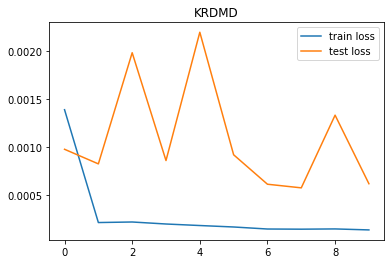

29/29 [==============================] - 1s 26ms/step
1-step MAPE: 1.469652629647898
1-step MAPE: 1.469652629647898


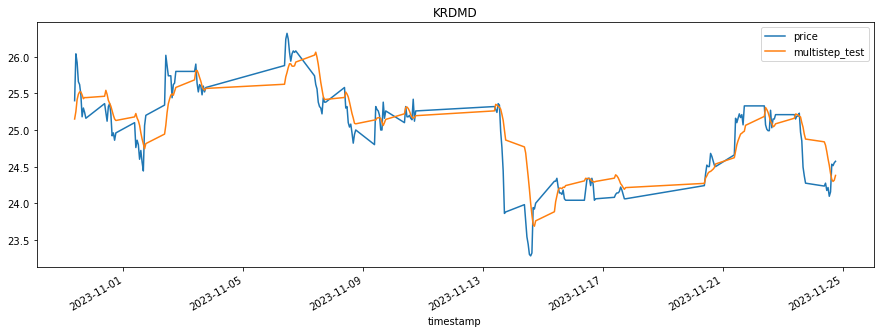

KCHOL
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 42s 81ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 2/10
437/437 [==============================] - 33s 75ms/step - loss: 1.5683e-04 - val_loss: 0.0020
Epoch 3/10
437/437 [==============================] - 39s 88ms/step - loss: 1.1738e-04 - val_loss: 0.0012
Epoch 4/10
437/437 [==============================] - 33s 75ms/step - loss: 1.3228e-04 - val_loss: 8.2257e-04
Epoch 5/10
437/437 [==============================] - 35s 80ms/step - loss: 1.4765e-04 - val_loss: 0.0031
Epoch 6/10
437/437 [==============================] - 33s 76ms/step - loss: 1.0246e-04 - val_loss: 0.0035
Epoch 7/10
437/437 [==============================] - 34s 79ms/step - loss: 9.2439e-05 - val_loss: 5.7818e-04
Epoch 8/10
437/437 [==============================] - 35s 79ms/step - loss: 9.5804e-05 - val_loss: 8.5181e-04
Epoch 9/10
437/437 [==============================] - 33s 76ms/step - loss: 8.7596e-05 - val_lo

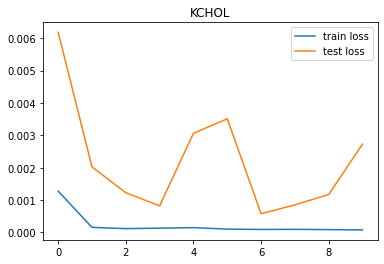

29/29 [==============================] - 1s 29ms/step
1-step MAPE: 1.493324616512377
1-step MAPE: 1.4933246165123768


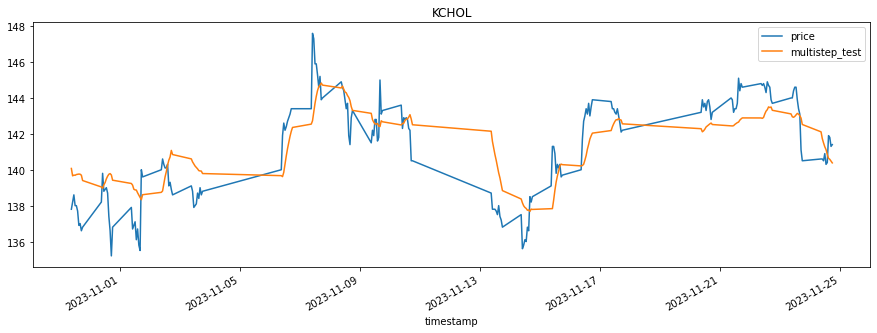

KOZAL
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 44s 85ms/step - loss: 0.0017 - val_loss: 0.0091
Epoch 2/10
437/437 [==============================] - 34s 78ms/step - loss: 2.7855e-04 - val_loss: 0.0039
Epoch 3/10
437/437 [==============================] - 34s 77ms/step - loss: 2.3600e-04 - val_loss: 9.2819e-04
Epoch 4/10
437/437 [==============================] - 35s 80ms/step - loss: 2.4391e-04 - val_loss: 0.0013
Epoch 5/10
437/437 [==============================] - 35s 80ms/step - loss: 1.8992e-04 - val_loss: 0.0010
Epoch 6/10
437/437 [==============================] - 41s 93ms/step - loss: 2.0062e-04 - val_loss: 9.2386e-04
Epoch 7/10
437/437 [==============================] - 41s 95ms/step - loss: 1.7743e-04 - val_loss: 7.2209e-04
Epoch 8/10
437/437 [==============================] - 40s 91ms/step - loss: 1.7264e-04 - val_loss: 0.0059
Epoch 9/10
437/437 [==============================] - 40s 92ms/step - loss: 1.8750e-04 - val_lo

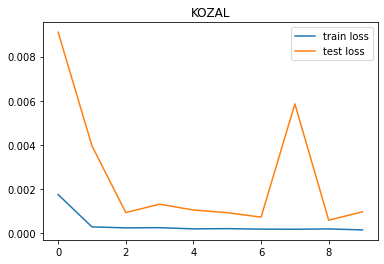

29/29 [==============================] - 1s 28ms/step
1-step MAPE: 1.6276549044730286
1-step MAPE: 1.6276549044730286


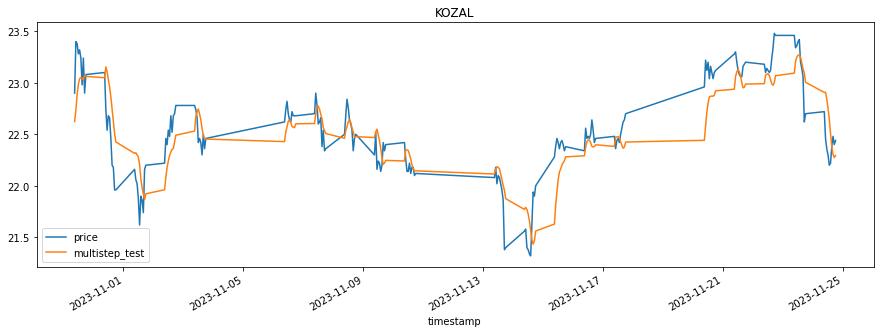

KOZAA
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 45s 84ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 2/10
437/437 [==============================] - 34s 77ms/step - loss: 2.4974e-04 - val_loss: 0.0011
Epoch 3/10
437/437 [==============================] - 39s 89ms/step - loss: 2.3549e-04 - val_loss: 0.0011
Epoch 4/10
437/437 [==============================] - 39s 88ms/step - loss: 2.4857e-04 - val_loss: 0.0013
Epoch 5/10
437/437 [==============================] - 36s 83ms/step - loss: 1.9929e-04 - val_loss: 0.0011
Epoch 6/10
437/437 [==============================] - 43s 99ms/step - loss: 2.2062e-04 - val_loss: 8.0052e-04
Epoch 7/10
437/437 [==============================] - 40s 92ms/step - loss: 1.6517e-04 - val_loss: 8.1294e-04
Epoch 8/10
437/437 [==============================] - 40s 91ms/step - loss: 1.6172e-04 - val_loss: 0.0014
Epoch 9/10
437/437 [==============================] - 42s 96ms/step - loss: 1.7058e-04 - val_loss: 

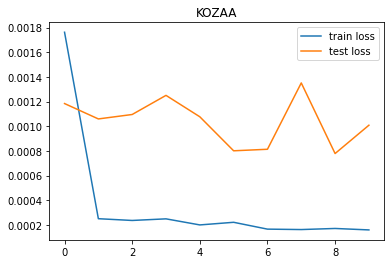

29/29 [==============================] - 1s 26ms/step
1-step MAPE: 1.6378347100271733
1-step MAPE: 1.637834710027173


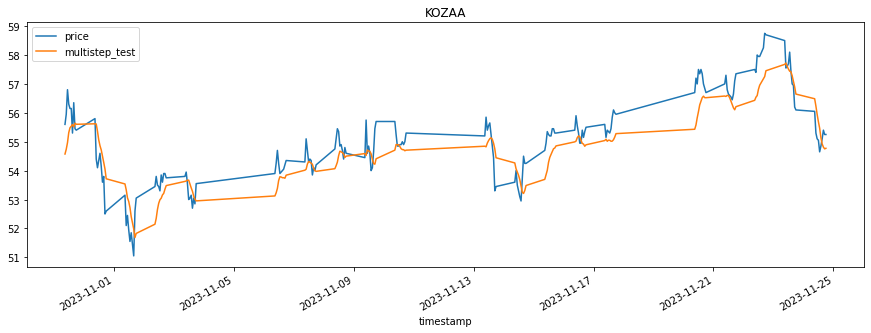

PGSUS
X.shape (14853, 10, 5) Y.shape (14853, 10)
Epoch 1/10
437/437 [==============================] - 49s 93ms/step - loss: 0.0010 - val_loss: 0.0067
Epoch 2/10
437/437 [==============================] - 39s 90ms/step - loss: 1.3861e-04 - val_loss: 0.0026
Epoch 3/10
437/437 [==============================] - 38s 86ms/step - loss: 1.2382e-04 - val_loss: 0.0019
Epoch 4/10
437/437 [==============================] - 37s 85ms/step - loss: 1.6788e-04 - val_loss: 4.0553e-04
Epoch 5/10
437/437 [==============================] - 37s 86ms/step - loss: 9.4937e-05 - val_loss: 3.6772e-04
Epoch 6/10
437/437 [==============================] - 38s 88ms/step - loss: 9.9383e-05 - val_loss: 7.7209e-04
Epoch 7/10
437/437 [==============================] - 38s 88ms/step - loss: 1.0842e-04 - val_loss: 5.5129e-04
Epoch 8/10
437/437 [==============================] - 33s 76ms/step - loss: 7.3383e-05 - val_loss: 5.3076e-04
Epoch 9/10
437/437 [==============================] - 46s 105ms/step - loss: 8.1741e-05

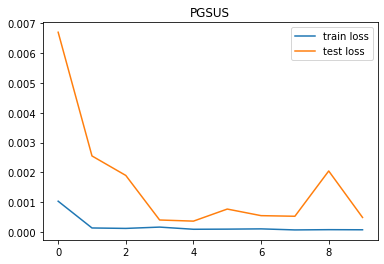

29/29 [==============================] - 1s 26ms/step
1-step MAPE: 1.446648055464718
1-step MAPE: 1.446648055464718


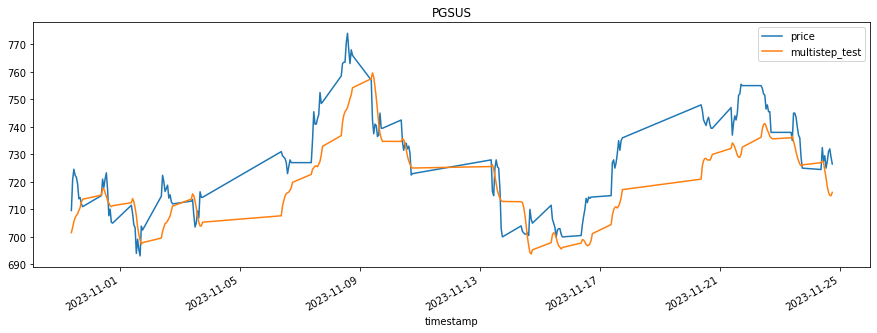

PETKM
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 53s 100ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 2/10
437/437 [==============================] - 38s 88ms/step - loss: 2.1147e-04 - val_loss: 8.6890e-04
Epoch 3/10
437/437 [==============================] - 38s 86ms/step - loss: 2.2048e-04 - val_loss: 0.0011
Epoch 4/10
437/437 [==============================] - 38s 86ms/step - loss: 2.1527e-04 - val_loss: 0.0040
Epoch 5/10
437/437 [==============================] - 38s 87ms/step - loss: 1.9479e-04 - val_loss: 0.0025
Epoch 6/10
437/437 [==============================] - 39s 90ms/step - loss: 1.9965e-04 - val_loss: 0.0011
Epoch 7/10
437/437 [==============================] - 39s 90ms/step - loss: 1.5825e-04 - val_loss: 7.1479e-04
Epoch 8/10
437/437 [==============================] - 42s 95ms/step - loss: 1.4433e-04 - val_loss: 6.1831e-04
Epoch 9/10
437/437 [==============================] - 41s 93ms/step - loss: 1.6517e-04 - val_l

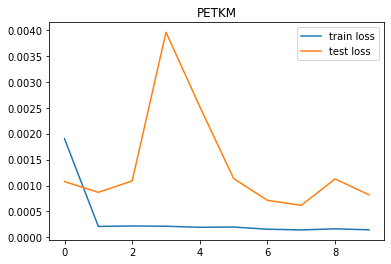

29/29 [==============================] - 1s 33ms/step
1-step MAPE: 1.7259672174828395
1-step MAPE: 1.7259672174828395


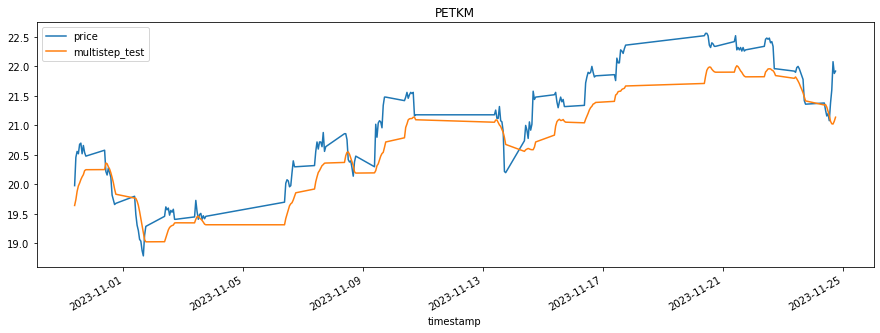

SAHOL
X.shape (14857, 10, 5) Y.shape (14857, 10)
Epoch 1/10
437/437 [==============================] - 49s 95ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 2/10
437/437 [==============================] - 40s 92ms/step - loss: 1.5623e-04 - val_loss: 9.8719e-04
Epoch 3/10
437/437 [==============================] - 41s 93ms/step - loss: 1.3454e-04 - val_loss: 0.0039
Epoch 4/10
437/437 [==============================] - 42s 95ms/step - loss: 1.5175e-04 - val_loss: 7.6803e-04
Epoch 5/10
437/437 [==============================] - 41s 94ms/step - loss: 1.4287e-04 - val_loss: 0.0012
Epoch 6/10
437/437 [==============================] - 40s 92ms/step - loss: 1.1693e-04 - val_loss: 0.0027
Epoch 7/10
437/437 [==============================] - 43s 97ms/step - loss: 1.1458e-04 - val_loss: 6.3601e-04
Epoch 8/10
437/437 [==============================] - 37s 84ms/step - loss: 1.1200e-04 - val_loss: 7.5474e-04
Epoch 9/10
437/437 [==============================] - 37s 84ms/step - loss: 8.4155e-05 - va

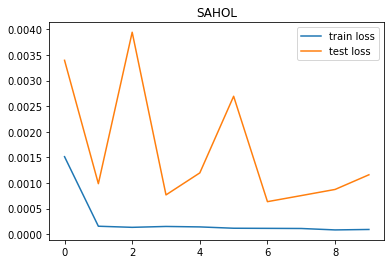

29/29 [==============================] - 1s 29ms/step
1-step MAPE: 1.5569859698187356
1-step MAPE: 1.5569859698187354


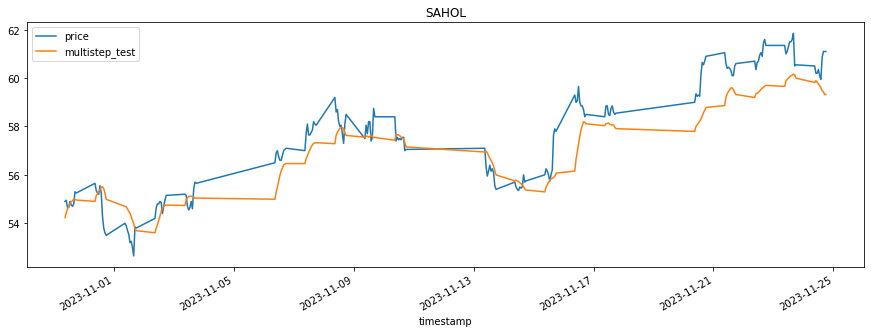

SASA
X.shape (14856, 10, 5) Y.shape (14856, 10)
Epoch 1/10
437/437 [==============================] - 42s 79ms/step - loss: 0.0015 - val_loss: 4.0506e-04
Epoch 2/10
437/437 [==============================] - 33s 75ms/step - loss: 2.7200e-04 - val_loss: 6.3699e-04
Epoch 3/10
437/437 [==============================] - 35s 79ms/step - loss: 2.3000e-04 - val_loss: 7.8301e-04
Epoch 4/10
437/437 [==============================] - 38s 88ms/step - loss: 2.1491e-04 - val_loss: 0.0014
Epoch 5/10
437/437 [==============================] - 39s 89ms/step - loss: 2.1878e-04 - val_loss: 5.9580e-04
Epoch 6/10
437/437 [==============================] - 39s 89ms/step - loss: 1.9355e-04 - val_loss: 4.1347e-04
Epoch 7/10
437/437 [==============================] - 39s 89ms/step - loss: 1.8973e-04 - val_loss: 3.2879e-04
Epoch 8/10
437/437 [==============================] - 38s 87ms/step - loss: 1.7489e-04 - val_loss: 0.0013
Epoch 9/10
437/437 [==============================] - 50s 114ms/step - loss: 1.5359e

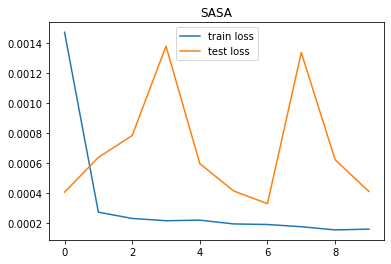

29/29 [==============================] - 1s 24ms/step
1-step MAPE: 1.409268274703942
1-step MAPE: 1.4092682747039418


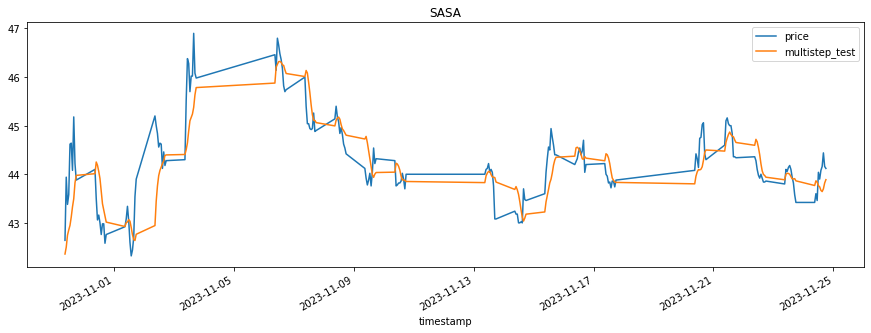

SISE
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 39s 75ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 2/10
437/437 [==============================] - 31s 72ms/step - loss: 2.2644e-04 - val_loss: 4.9446e-04
Epoch 3/10
437/437 [==============================] - 31s 71ms/step - loss: 1.9691e-04 - val_loss: 0.0034
Epoch 4/10
437/437 [==============================] - 31s 71ms/step - loss: 2.7851e-04 - val_loss: 7.8608e-04
Epoch 5/10
437/437 [==============================] - 31s 72ms/step - loss: 1.3983e-04 - val_loss: 0.0023
Epoch 6/10
437/437 [==============================] - 31s 71ms/step - loss: 1.6257e-04 - val_loss: 0.0038
Epoch 7/10
437/437 [==============================] - 32s 73ms/step - loss: 1.7414e-04 - val_loss: 4.1187e-04
Epoch 8/10
437/437 [==============================] - 33s 75ms/step - loss: 1.3498e-04 - val_loss: 4.7395e-04
Epoch 9/10
437/437 [==============================] - 32s 72ms/step - loss: 1.3421e-04 - val

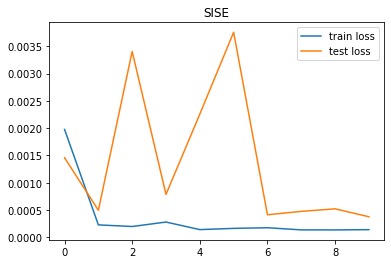

29/29 [==============================] - 1s 23ms/step
1-step MAPE: 2.131321652534958
1-step MAPE: 2.1313216525349583


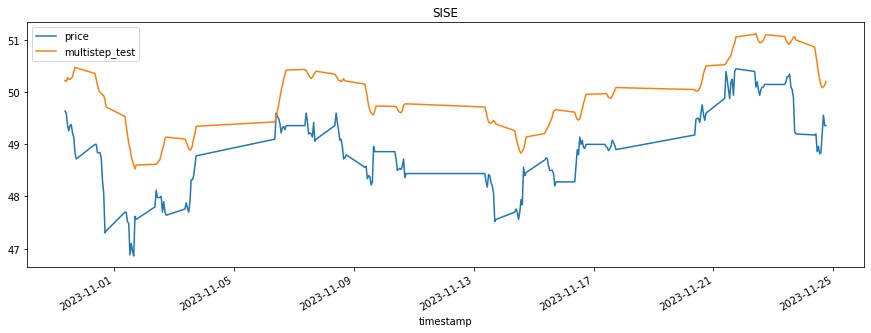

TAVHL
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 39s 76ms/step - loss: 0.0016 - val_loss: 6.6343e-04
Epoch 2/10
437/437 [==============================] - 32s 72ms/step - loss: 2.1419e-04 - val_loss: 6.5428e-04
Epoch 3/10
437/437 [==============================] - 32s 72ms/step - loss: 1.7393e-04 - val_loss: 6.5588e-04
Epoch 4/10
437/437 [==============================] - 32s 72ms/step - loss: 1.4758e-04 - val_loss: 7.5200e-04
Epoch 5/10
437/437 [==============================] - 31s 72ms/step - loss: 1.6189e-04 - val_loss: 8.4591e-04
Epoch 6/10
437/437 [==============================] - 31s 72ms/step - loss: 1.5988e-04 - val_loss: 0.0026
Epoch 7/10
437/437 [==============================] - 31s 72ms/step - loss: 1.6505e-04 - val_loss: 0.0016
Epoch 8/10
437/437 [==============================] - 31s 72ms/step - loss: 1.2985e-04 - val_loss: 9.6323e-04
Epoch 9/10
437/437 [==============================] - 31s 72ms/step - loss: 1.1973e

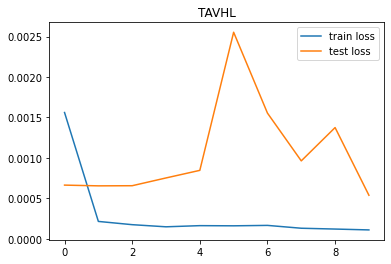

29/29 [==============================] - 1s 23ms/step
1-step MAPE: 1.1992962355536283
1-step MAPE: 1.1992962355536283


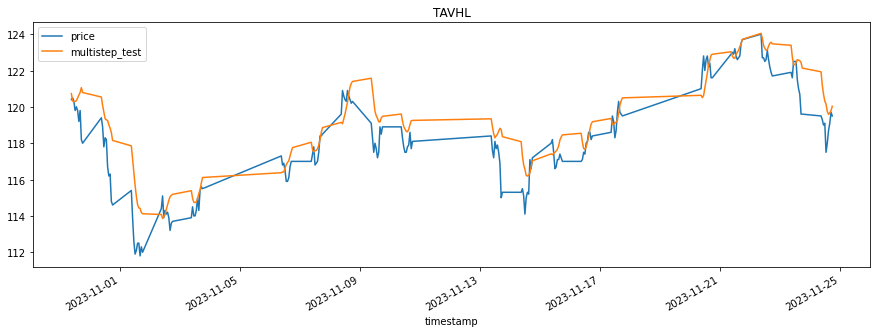

TKFEN
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 40s 74ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 2/10
437/437 [==============================] - 32s 74ms/step - loss: 3.2639e-04 - val_loss: 0.0012
Epoch 3/10
437/437 [==============================] - 32s 73ms/step - loss: 3.1080e-04 - val_loss: 0.0016
Epoch 4/10
437/437 [==============================] - 32s 74ms/step - loss: 3.1338e-04 - val_loss: 0.0011
Epoch 5/10
437/437 [==============================] - 32s 73ms/step - loss: 2.4930e-04 - val_loss: 0.0025
Epoch 6/10
437/437 [==============================] - 32s 74ms/step - loss: 2.7854e-04 - val_loss: 0.0016
Epoch 7/10
437/437 [==============================] - 32s 73ms/step - loss: 2.3007e-04 - val_loss: 9.3514e-04
Epoch 8/10
437/437 [==============================] - 32s 73ms/step - loss: 2.2126e-04 - val_loss: 9.8620e-04
Epoch 9/10
437/437 [==============================] - 32s 73ms/step - loss: 2.0817e-04 - val_loss: 

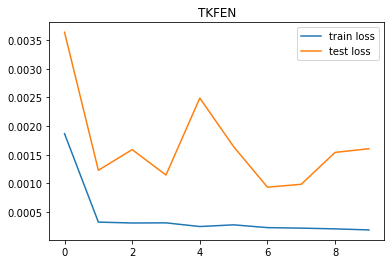

29/29 [==============================] - 1s 23ms/step
1-step MAPE: 1.6891521528102253
1-step MAPE: 1.6891521528102245


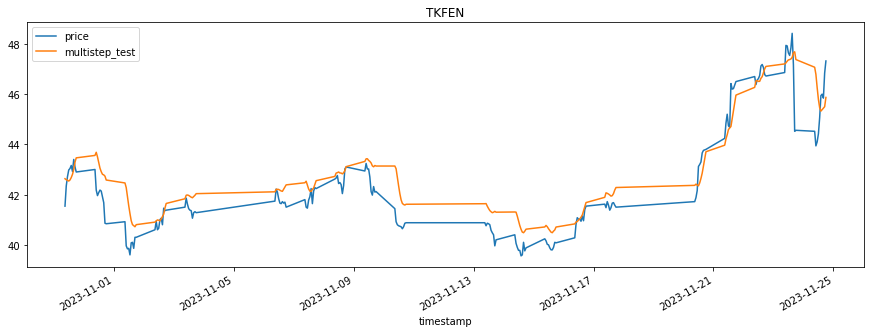

TUPRS
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 40s 76ms/step - loss: 7.5476e-04 - val_loss: 0.0110
Epoch 2/10
437/437 [==============================] - 32s 74ms/step - loss: 1.1267e-04 - val_loss: 0.0038
Epoch 3/10
437/437 [==============================] - 32s 74ms/step - loss: 8.6550e-05 - val_loss: 0.0011
Epoch 4/10
437/437 [==============================] - 32s 73ms/step - loss: 1.1080e-04 - val_loss: 0.0029
Epoch 5/10
437/437 [==============================] - 32s 73ms/step - loss: 5.9226e-05 - val_loss: 0.0063
Epoch 6/10
437/437 [==============================] - 32s 73ms/step - loss: 6.2738e-05 - val_loss: 0.0093
Epoch 7/10
437/437 [==============================] - 32s 73ms/step - loss: 5.4201e-05 - val_loss: 0.0016
Epoch 8/10
437/437 [==============================] - 32s 73ms/step - loss: 6.4874e-05 - val_loss: 0.0022
Epoch 9/10
437/437 [==============================] - 32s 74ms/step - loss: 6.2060e-05 - val_loss: 0.00

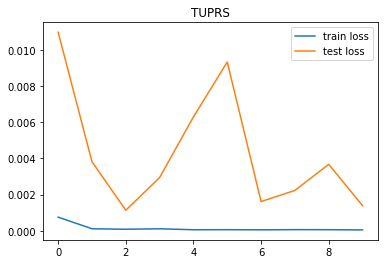

29/29 [==============================] - 1s 26ms/step
1-step MAPE: 3.4210792627354625
1-step MAPE: 3.4210792627354625


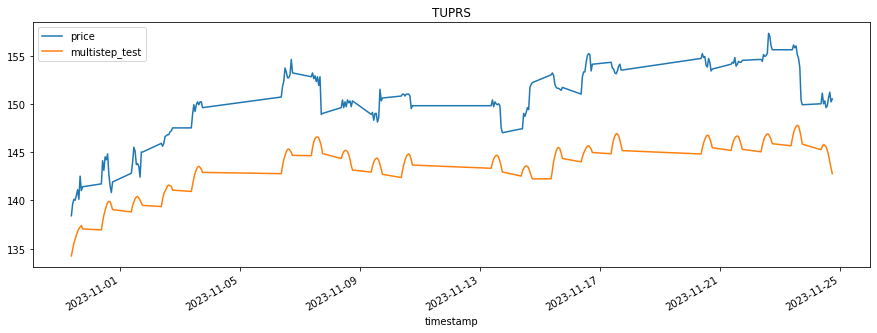

TTKOM
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 41s 77ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2/10
437/437 [==============================] - 32s 73ms/step - loss: 2.8983e-04 - val_loss: 0.0015
Epoch 3/10
437/437 [==============================] - 32s 73ms/step - loss: 2.5700e-04 - val_loss: 9.8155e-04
Epoch 4/10
437/437 [==============================] - 32s 74ms/step - loss: 2.5632e-04 - val_loss: 0.0017
Epoch 5/10
437/437 [==============================] - 32s 74ms/step - loss: 2.1177e-04 - val_loss: 9.1745e-04
Epoch 6/10
437/437 [==============================] - 32s 73ms/step - loss: 2.6939e-04 - val_loss: 0.0014
Epoch 7/10
437/437 [==============================] - 32s 72ms/step - loss: 1.8628e-04 - val_loss: 7.9379e-04
Epoch 8/10
437/437 [==============================] - 32s 72ms/step - loss: 1.7339e-04 - val_loss: 9.8182e-04
Epoch 9/10
437/437 [==============================] - 32s 72ms/step - loss: 1.7829e-04 - va

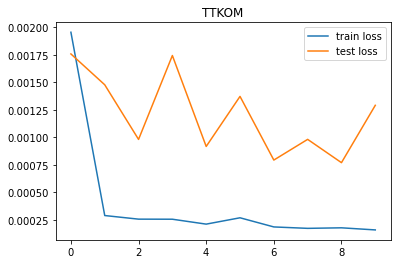

29/29 [==============================] - 1s 26ms/step
1-step MAPE: 1.6152660492713835
1-step MAPE: 1.615266049271383


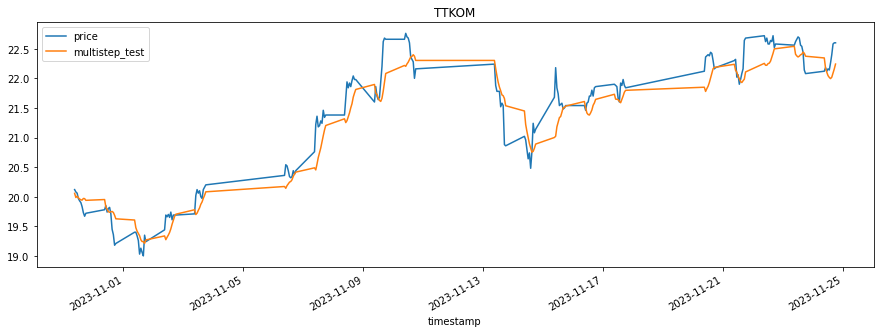

TCELL
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 40s 77ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 2/10
437/437 [==============================] - 33s 75ms/step - loss: 1.7079e-04 - val_loss: 0.0011
Epoch 3/10
437/437 [==============================] - 33s 76ms/step - loss: 1.6567e-04 - val_loss: 0.0014
Epoch 4/10
437/437 [==============================] - 33s 76ms/step - loss: 1.9036e-04 - val_loss: 7.8197e-04
Epoch 5/10
437/437 [==============================] - 33s 75ms/step - loss: 1.3891e-04 - val_loss: 0.0020
Epoch 6/10
437/437 [==============================] - 33s 75ms/step - loss: 1.4843e-04 - val_loss: 0.0022
Epoch 7/10
437/437 [==============================] - 33s 74ms/step - loss: 1.2773e-04 - val_loss: 0.0011
Epoch 8/10
437/437 [==============================] - 32s 73ms/step - loss: 1.3016e-04 - val_loss: 6.7517e-04
Epoch 9/10
437/437 [==============================] - 32s 73ms/step - loss: 1.1770e-04 - val_loss: 

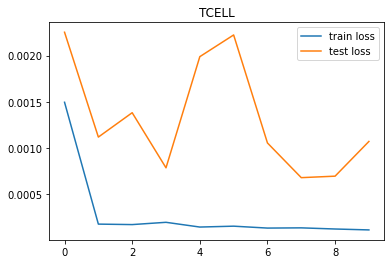

29/29 [==============================] - 1s 23ms/step
1-step MAPE: 1.5422915231778274
1-step MAPE: 1.5422915231778271


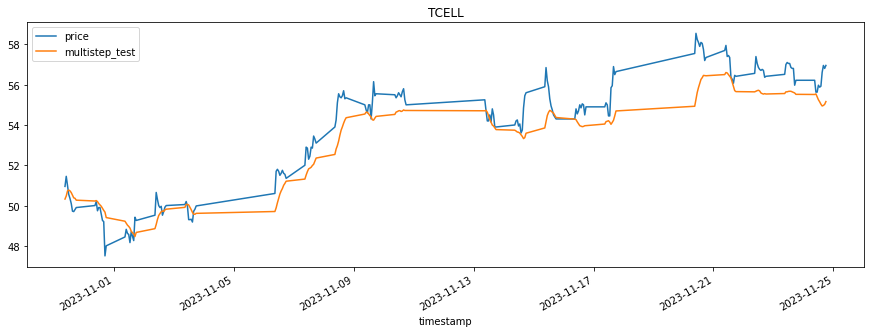

HALKB
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 40s 76ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 2/10
437/437 [==============================] - 32s 73ms/step - loss: 5.7235e-04 - val_loss: 0.0012
Epoch 3/10
437/437 [==============================] - 32s 73ms/step - loss: 5.0528e-04 - val_loss: 0.0010
Epoch 4/10
437/437 [==============================] - 32s 73ms/step - loss: 4.4090e-04 - val_loss: 0.0012
Epoch 5/10
437/437 [==============================] - 32s 74ms/step - loss: 4.0908e-04 - val_loss: 0.0036
Epoch 6/10
437/437 [==============================] - 33s 76ms/step - loss: 4.0790e-04 - val_loss: 0.0018
Epoch 7/10
437/437 [==============================] - 33s 74ms/step - loss: 3.5589e-04 - val_loss: 0.0013
Epoch 8/10
437/437 [==============================] - 33s 75ms/step - loss: 3.2563e-04 - val_loss: 9.5858e-04
Epoch 9/10
437/437 [==============================] - 33s 75ms/step - loss: 3.3369e-04 - val_loss: 6.96

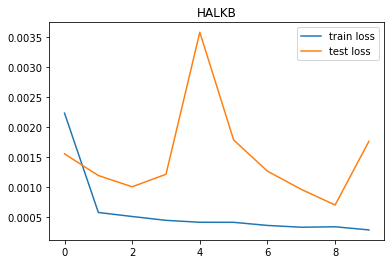

29/29 [==============================] - 1s 27ms/step
1-step MAPE: 0.9746031011803898
1-step MAPE: 0.9746031011803883


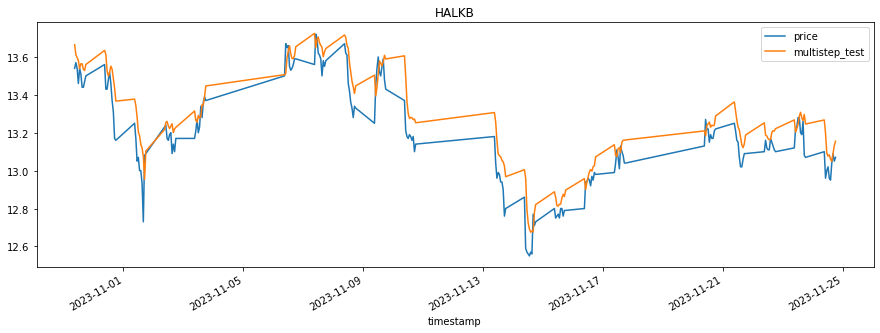

ISCTR
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 42s 78ms/step - loss: 8.4541e-04 - val_loss: 0.0090
Epoch 2/10
437/437 [==============================] - 32s 74ms/step - loss: 1.5656e-04 - val_loss: 0.0062
Epoch 3/10
437/437 [==============================] - 32s 73ms/step - loss: 1.3381e-04 - val_loss: 0.0054
Epoch 4/10
437/437 [==============================] - 32s 73ms/step - loss: 1.2273e-04 - val_loss: 0.0108
Epoch 5/10
437/437 [==============================] - 32s 73ms/step - loss: 1.0805e-04 - val_loss: 0.0119
Epoch 6/10
437/437 [==============================] - 33s 75ms/step - loss: 1.0162e-04 - val_loss: 0.0073
Epoch 7/10
437/437 [==============================] - 33s 77ms/step - loss: 9.2646e-05 - val_loss: 0.0068
Epoch 8/10
437/437 [==============================] - 33s 75ms/step - loss: 8.0051e-05 - val_loss: 0.0018
Epoch 9/10
437/437 [==============================] - 33s 76ms/step - loss: 8.9550e-05 - val_loss: 0.00

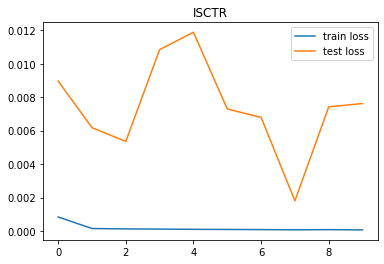

29/29 [==============================] - 1s 28ms/step
1-step MAPE: 2.7179623719719106
1-step MAPE: 2.717962371971911


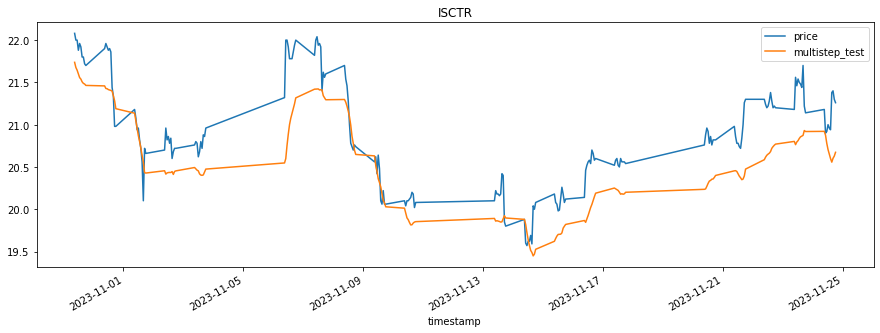

VAKBN
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 41s 77ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 2/10
437/437 [==============================] - 33s 74ms/step - loss: 3.3704e-04 - val_loss: 0.0091
Epoch 3/10
437/437 [==============================] - 32s 74ms/step - loss: 3.2359e-04 - val_loss: 0.0034
Epoch 4/10
437/437 [==============================] - 33s 76ms/step - loss: 2.5202e-04 - val_loss: 0.0050
Epoch 5/10
437/437 [==============================] - 32s 74ms/step - loss: 2.3018e-04 - val_loss: 0.0058
Epoch 6/10
437/437 [==============================] - 32s 74ms/step - loss: 2.3260e-04 - val_loss: 0.0050
Epoch 7/10
437/437 [==============================] - 32s 73ms/step - loss: 2.1110e-04 - val_loss: 0.0040
Epoch 8/10
437/437 [==============================] - 32s 73ms/step - loss: 2.0504e-04 - val_loss: 0.0024
Epoch 9/10
437/437 [==============================] - 32s 73ms/step - loss: 1.9094e-04 - val_loss: 0.0014
E

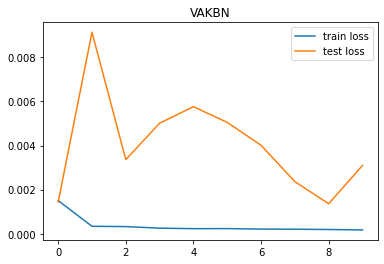

29/29 [==============================] - 1s 25ms/step
1-step MAPE: 2.2397180556437064
1-step MAPE: 2.2397180556437064


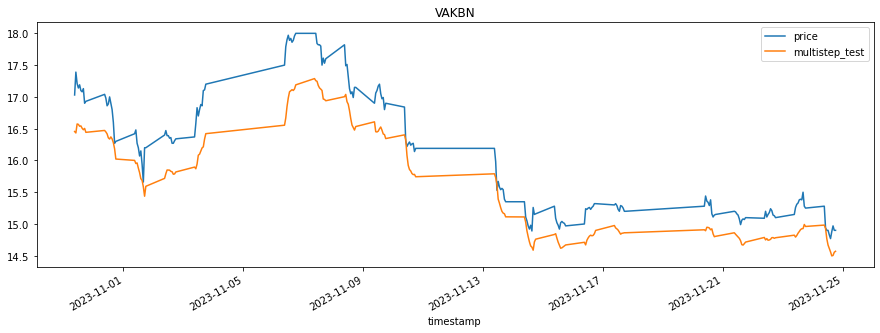

VESTL
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 40s 77ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 2/10
437/437 [==============================] - 32s 74ms/step - loss: 2.5627e-04 - val_loss: 5.4467e-04
Epoch 3/10
437/437 [==============================] - 32s 74ms/step - loss: 2.6750e-04 - val_loss: 0.0013
Epoch 4/10
437/437 [==============================] - 32s 74ms/step - loss: 2.4376e-04 - val_loss: 9.0049e-04
Epoch 5/10
437/437 [==============================] - 33s 75ms/step - loss: 2.3042e-04 - val_loss: 5.7054e-04
Epoch 6/10
437/437 [==============================] - 32s 74ms/step - loss: 2.2551e-04 - val_loss: 5.9921e-04
Epoch 7/10
437/437 [==============================] - 32s 74ms/step - loss: 1.8082e-04 - val_loss: 9.7504e-04
Epoch 8/10
437/437 [==============================] - 33s 76ms/step - loss: 1.6339e-04 - val_loss: 8.5533e-04
Epoch 9/10
437/437 [==============================] - 32s 74ms/step - loss: 1.8432e

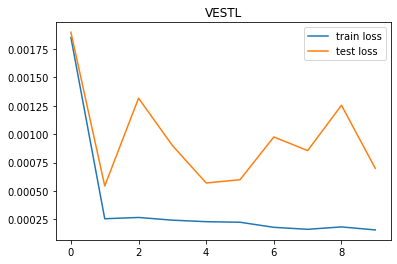

29/29 [==============================] - 1s 26ms/step
1-step MAPE: 1.7560109649955635
1-step MAPE: 1.756010964995563


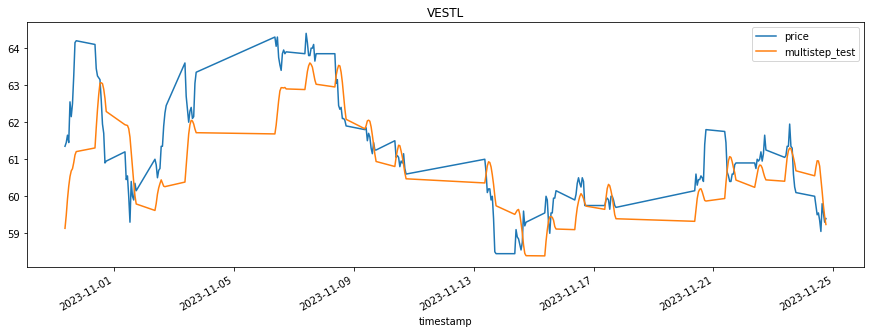

YKBNK
X.shape (14858, 10, 5) Y.shape (14858, 10)
Epoch 1/10
437/437 [==============================] - 40s 78ms/step - loss: 9.3283e-04 - val_loss: 0.0044
Epoch 2/10
437/437 [==============================] - 33s 76ms/step - loss: 1.4967e-04 - val_loss: 0.0043
Epoch 3/10
437/437 [==============================] - 32s 73ms/step - loss: 1.6631e-04 - val_loss: 0.0026
Epoch 4/10
437/437 [==============================] - 32s 73ms/step - loss: 1.4107e-04 - val_loss: 0.0016
Epoch 5/10
437/437 [==============================] - 32s 73ms/step - loss: 1.1050e-04 - val_loss: 0.0034
Epoch 6/10
437/437 [==============================] - 32s 74ms/step - loss: 1.2288e-04 - val_loss: 0.0029
Epoch 7/10
437/437 [==============================] - 32s 73ms/step - loss: 1.0279e-04 - val_loss: 0.0031
Epoch 8/10
437/437 [==============================] - 32s 72ms/step - loss: 8.3578e-05 - val_loss: 8.4205e-04
Epoch 9/10
437/437 [==============================] - 32s 72ms/step - loss: 8.5060e-05 - val_loss: 

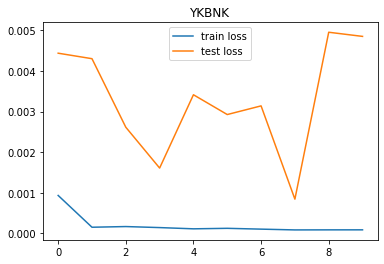

29/29 [==============================] - 1s 26ms/step
1-step MAPE: 1.7808773438125025
1-step MAPE: 1.7808773438125025


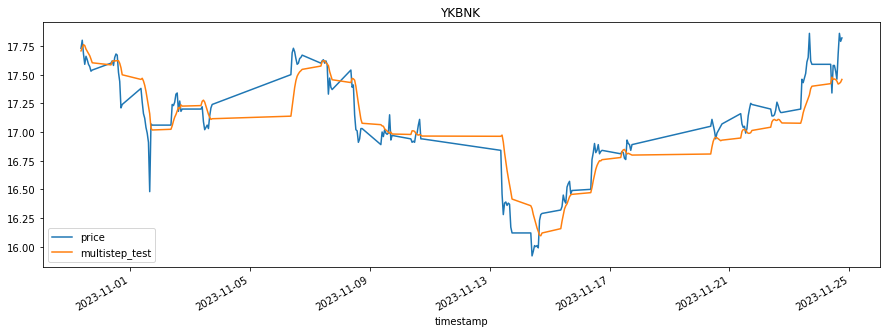

In [11]:
for stockname in bist30:
    print(stockname)

    df = input_df[input_df['short_name'] == stockname]
    df=df.drop(columns=['short_name'])

    mape,df_out,Ytest,Ptest=createModel(T,Ntest,Nsplit,df,epoch_number,Layer1,Layer2,featureNumber,stockname)

    mape_dict[stockname] = mape
    df_out_dict[stockname] = df_out
    Ytest_dict[stockname] = Ytest
    Ptest_dict[stockname] = Ptest

In [25]:
#mape results of different stocks
stocks = list(mape_dict.keys())
mape_values = list(mape_dict.values())

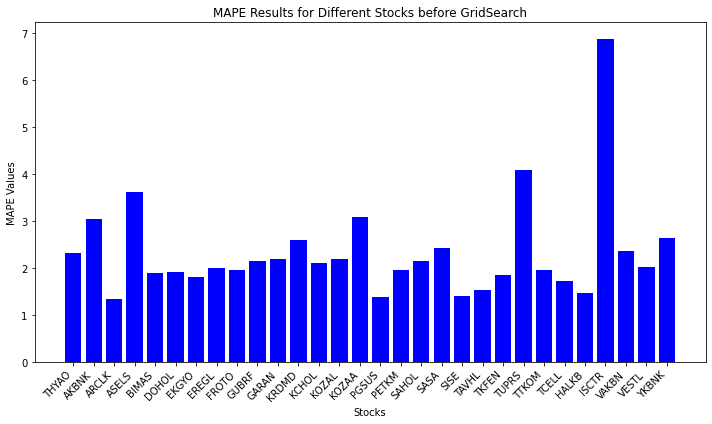

In [26]:
# Plotting the column chart
plt.figure(figsize=(10, 6))
plt.bar(stocks, mape_values, color='blue')
plt.xlabel('Stocks')
plt.ylabel('MAPE Values')
plt.title('MAPE Results for Different Stocks before GridSearch')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

GRIDSEARCH

In [ ]:
T_dict = [10]
Ntest_dict = [10]
Nsplit_dict = [60*10]
Layer1_dict = [128,256]
Layer2_dict = [128,256]
epoch_number_dict = [5,10]
featureNumber=5

In [ ]:
best_params_gridsearch={}
best_score_gridsearch={}

In [ ]:
for stockname in bist30:
    print(stockname)
    df = input_df[input_df['short_name'] == stockname]
    df=df.drop(columns=['short_name'])

    best_params, best_score=gridSearch(T_dict,Ntest_dict,Nsplit_dict,df,Layer1_dict,Layer2_dict,epoch_number_dict,featureNumber,stockname)

    best_params_gridsearch[stockname] = best_params
    best_score_gridsearch[stockname] = best_score

MODEL CREATION AFTER GRIDSEARCH

In [ ]:
#initialize mape dictionary to store performance
mape_dict_after_grid={}
df_out_dict_after_grid={}
Ytest_dict_after_grid={}
Ptest_dict_after_grid={}

In [ ]:
for stockname in bist30:
    print(stockname)
    

    df = input_df[input_df['short_name'] == stockname]
    df=df.drop(columns=['short_name'])

    Layer1=best_params_gridsearch[stockname]['Layer1']
    Layer2 = best_params_gridsearch[stockname]['Layer2']

    mape,df_out,Ytest,Ptest=createModel(T,Ntest,Nsplit,df,epoch_number,Layer1,Layer2,featureNumber,stockname)

    mape_dict_after_grid[stockname] = mape
    df_out_dict_after_grid[stockname] = df_out
    Ytest_dict_after_grid[stockname] = Ytest
    Ptest_dict_after_grid[stockname] = Ptest

In [30]:
#mape results of different stocks
stocks = list(mape_dict_after_grid.keys())
mape_values = list(mape_dict_after_grid.values())

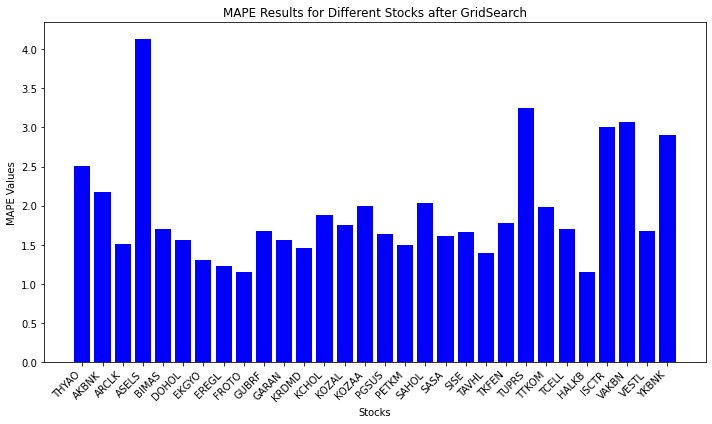

In [31]:
# Plotting the column chart
plt.figure(figsize=(10, 6))
plt.bar(stocks, mape_values, color='blue')
plt.xlabel('Stocks')
plt.ylabel('MAPE Values')
plt.title('MAPE Results for Different Stocks after GridSearch')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

FORECAST GENERATION

In [ ]:
concatenated_df=pd.DataFrame()

In [ ]:
for stockname in bist30:

    df = input_df[input_df['short_name'] == stockname]
    df = df.drop(columns=['short_name'])
    scaler_name = "minmax_scaler_{}".format(stockname)
    model_name = "bestmodel_{}.h5".format(stockname)


    df_out = createIntradayForecast(df,T,Ntest,featureNumber,scaler_name,model_name,stockname)
    concatenated_df = pd.concat([concatenated_df, df_out])